# TP Statistiques descriptives


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections

## Statistique monovariée

Le tableau suivant donne les notes (sur 10) obtenues à un examen par un groupe d'élèves. 
$\begin{array}{c|c}
Nom & Note \\
  \hline
Alain &6\\
Raymond &5\\
Jean-Joseph &9\\
Eglantine &3\\
Isidore &3\\
Mauricette &1\\
Sylvère &9\\
Pétunia &6\\
Philemon &5\\
Archibald &6\\
Théodule &5\\
Marguerite &6\\
Proserpine &5\\
Alphonse &7\\
Géraud &5\\
Basile &10\\
Fantine &2\\
Sidonie &1\\
Thérèse &1\\
Yves &1
\end{array}$

In [2]:
notes = np.array([6, 5, 9, 3, 3, 1, 9, 6, 5, 6, 5, 6, 5, 7, 5, 10, 2, 1, 1, 1])


Donner les différentes modalités possibles

In [3]:
# Modalités = les différentes valeurs possibles.
modalites = np.unique(notes)
print(modalites)

[ 1  2  3  5  6  7  9 10]


Calculer les effectifs cumulés de chaque modalité. 

In [8]:
_, n_i = np.unique(notes, return_counts=True)
N_i = np.cumsum(n_i)
modalites, n_i, N_i

(array([ 1,  2,  3,  5,  6,  7,  9, 10]),
 array([4, 1, 2, 5, 4, 1, 2, 1], dtype=int64),
 array([ 4,  5,  7, 12, 16, 17, 19, 20], dtype=int64))

Calculer les effectifs par modalité, les fréquences et les fréquences cumulées des notes

In [9]:
f_i = n_i / len(notes) #Fréquences
F_i = N_i / len(notes) #Fréquences cumulées

# Affichage
dat_dtype = {
    'names' : ('modalites', 'n_i', 'N_i', 'f_i', 'F_i'),
    'formats' : ('i', 'd', 'd', 'd', 'd')
}

dat = np.zeros(modalites.shape[0], dat_dtype)
dat['modalites'] = modalites
dat['n_i'] = n_i
dat['N_i'] = N_i
dat['f_i'] = f_i
dat['F_i'] = F_i

from prettytable import PrettyTable
x = PrettyTable(dat.dtype.names)
for row in dat:
    x.add_row(row)
print(x)

lib = ['modalites','n_i''N_i','f_i','F_i']
tab = np.column_stack((modalites,n_i,N_i,f_i,F_i))
print(type(tab))

+-----------+-----+------+------+------+
| modalites | n_i | N_i  | f_i  | F_i  |
+-----------+-----+------+------+------+
|     1     | 4.0 | 4.0  | 0.2  | 0.2  |
|     2     | 1.0 | 5.0  | 0.05 | 0.25 |
|     3     | 2.0 | 7.0  | 0.1  | 0.35 |
|     5     | 5.0 | 12.0 | 0.25 | 0.6  |
|     6     | 4.0 | 16.0 | 0.2  | 0.8  |
|     7     | 1.0 | 17.0 | 0.05 | 0.85 |
|     9     | 2.0 | 19.0 | 0.1  | 0.95 |
|     10    | 1.0 | 20.0 | 0.05 | 1.0  |
+-----------+-----+------+------+------+
<class 'numpy.ndarray'>


Représenter avec un (ou plusieurs) graphique(s) adapté(s) la répartition des notes

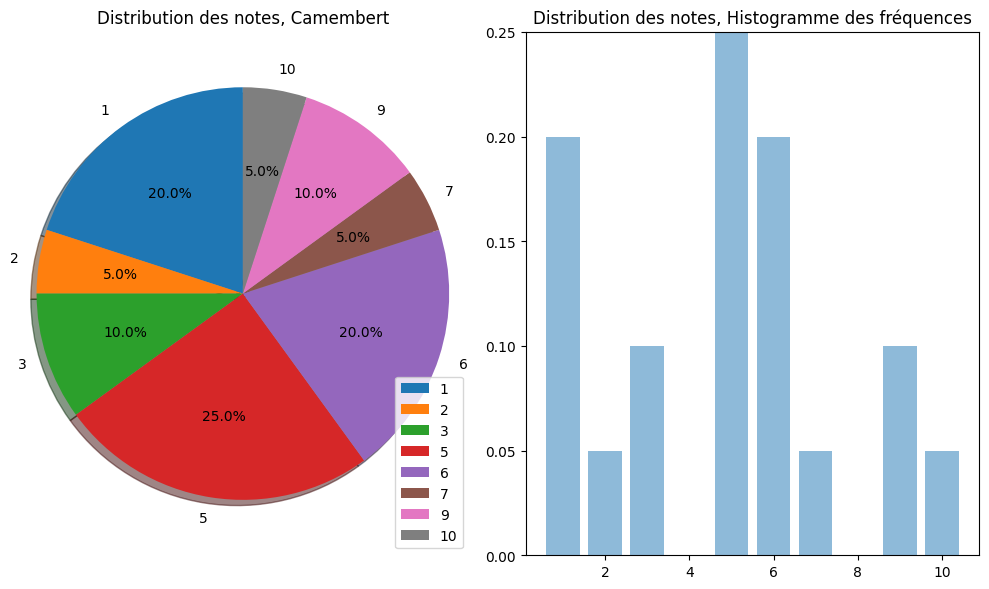

In [11]:
plt.figure(figsize=(10,6))

#Camembert
plt.subplot(1, 2, 1) # En combien de 'page', combien de figures sur cette page, la numéro combien?
plt.pie(n_i, labels=modalites,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%') #Affichage des valeurs

plt.legend(fancybox=True, loc='lower right') #Légende
plt.title("Distribution des notes, Camembert")
plt.axis('equal')

#Histogramme
plt.subplot(1,2,2)
plt.bar(modalites,f_i,alpha=0.5)
plt.ylim((0, np.max(f_i)))
plt.title("Distribution des notes, Histogramme des fréquences")
plt.tight_layout()
plt.show()

En déduire (et afficher) la fonction de répartition empirique des notes.

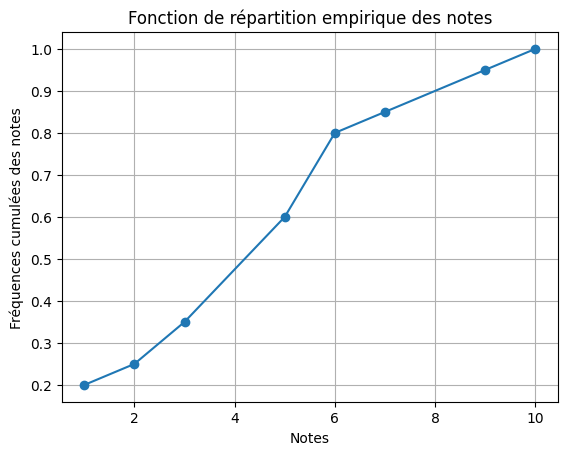

In [13]:
plt.plot(modalites, F_i, "o-")
plt.title("Fonction de répartition empirique des notes")
plt.xlabel("Notes")
plt.ylabel("Fréquences cumulées des notes")
plt.grid(True) #Grille en fond.

En utilisant la fonction [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html), tracer la boîte à moustache des notes. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca1e789820>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca1e788080>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca1e890e00>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca1e7898e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca1e78a9f0>],
 'means': []}

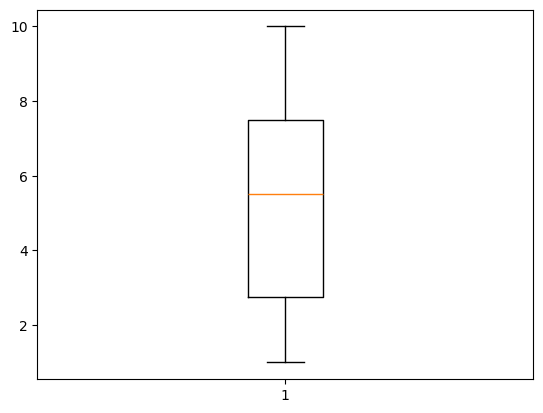

In [14]:
plt.boxplot(modalites)

Calculer les éléments caractéristiques (indicateurs de tendance, de dispersion) des notes.

In [15]:
moyenne = np.mean(notes)
mediane = np.median(notes)
variance = np.var(notes)

print("Moyenne ", moyenne, " Médiane ", mediane, " Variance ", variance)

Moyenne  4.8  Médiane  5.0  Variance  7.26


## Statistique bivariée

### Cas de variables quantitatives

On donne le fichier de données suivant

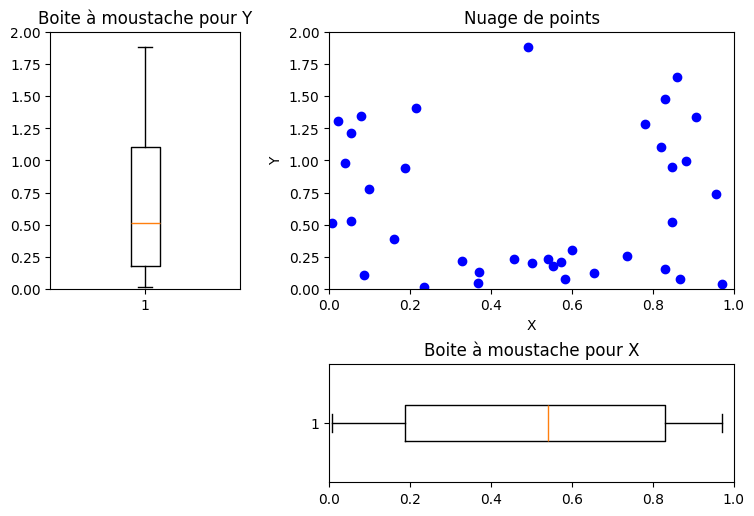

In [18]:
X=np.loadtxt('./bivariee.txt',delimiter=',')
plt.figure(figsize=(12,8))

plt.subplot(2,2,2)
plt.plot(X[:,0],X[:,1],'ob')
plt.axis([0,1,0,2])
plt.title('Nuage de points')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(4,2,6)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.boxplot(X[:,0],0,'+',0)
plt.axis([0,1,0.75,1.25])
plt.title('Boite à moustache pour X')

plt.subplot(2,4,2)
plt.boxplot(X[:,1],0,'+',1)
a = plt.axis()
plt.axis([a[0], a[1], 0, 2])
plt.title('Boite à moustache pour Y')
plt.show()

Calculer la covariance entre les deux variables. Conclusion ?

In [19]:
n = len(X)
# np.cov(X) -> donne une matrice de covariance
# X.T -> renvoie la matrice transposée
C = (np.cov(X.T) * (n-1)) / n
print(C[0,1])

-0.0017884644338933538


Calculer la corrélation entre les deux variables. Conclusion ?

In [20]:
C = np.corrcoef(X.T)
print(C[0,1])

-0.010286405751158675


### Cas de variables qualitatives

On s'intéresse à un fichier décrivant la réussite d'étudiants en mathématiques (données décrites [ici](https://archive.ics.uci.edu/ml/datasets/Student+Performance)) 

In [21]:
import pandas as pd
result = pd.read_csv('./student.csv',delimiter=';')

C:\Users\Ryadh\AppData\Local\Temp\ipykernel_19788\2133131991.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
print(result)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

On regarde les deux premières colonnes des données (code de l'école et genre de l'étudiant)

In [23]:
x = result.values[:,0]
g = result.values[:,1]

Construire le tableau de contingence de ces deux variables

In [25]:
# On a que 2 écoles et 2 sexe différents.
# Donc tableau de contingence 2x2
T = np.zeros((2,2))
T[0,0] = np.sum(np.logical_and((x == 'GP'), (g == 'F')))
T[0,1] = np.sum(np.logical_and((x == 'GP'), (g == 'M')))
T[1,0] = np.sum(np.logical_and((x == 'MS'), (g == 'F')))
T[1,1] = np.sum(np.logical_and((x == 'MS'), (g == 'M')))

T

array([[183., 166.],
       [ 25.,  21.]])

Construire le tableau théorique associé en supposant l’indépendance des deux variables.

In [26]:
Ml = np.sum(T, axis=0) #Somme sur les lignes
Mc = np.sum(T, axis=1) #Somme sur les colonnes
Th = np.outer(Ml, Mc).T / len(x)

Th

array([[183.77721519, 165.22278481],
       [ 24.22278481,  21.77721519]])

Calculer la distance du $\chi^2$ entre les variables $x$ et $g$. Ces deux variables sont elles liées ou sont elles indépendantes ?

In [27]:
# Indépendance lorsque khi_deux est proche de 0.
chi2 = np.sum(np.sum((T - Th)**2 / Th))
print("Distance du chi2 : ", chi2)
# On considère dans ce cas qu'il y a indépendance.

Distance du chi2 :  0.059619131674428574


On s’intéresse maintenant à la septième variable $ne$ qui code le niveau d’éducation des mères de la manière suivante :
- 0 - none,
- 1 - primary education (4th grade),
- 2 - 5th to 9th grade,
- 3 - secondary education
- 4 - higher education

Récupérer cette variable et calculer les effectifs de chacune des modalités. Calculer le tableau de contingence  entre les variables $x$ et $ne$

In [28]:
ne = result.values[:, 7]
mod_ne, eff_ne = np.unique(np.sort(ne), return_counts=True)
mod_ne, eff_ne

(array([0, 1, 2, 3, 4], dtype=object),
 array([  2,  82, 115, 100,  96], dtype=int64))

In [29]:
N = np.zeros((2,5))
N[0,0] = np.sum(np.logical_and((x=='GP'), (ne<=0)))
N[1,0] = np.sum(np.logical_and((x=='MS'), (ne<=0)))
N[0,1] = np.sum(np.logical_and((x=='GP'), (ne==1)))
N[1,1] = np.sum(np.logical_and((x=='MS'), (ne==1)))
N[0,2] = np.sum(np.logical_and((x=='GP'), (ne==2)))
N[1,2] = np.sum(np.logical_and((x=='MS'), (ne==2)))
N[0,3] = np.sum(np.logical_and((x=='GP'), (ne==3)))
N[1,3] = np.sum(np.logical_and((x=='MS'), (ne==3)))
N[0,4] = np.sum(np.logical_and((x=='GP'), (ne==4)))
N[1,4] = np.sum(np.logical_and((x=='MS'), (ne==4)))

In [30]:
N

array([[  2.,  67., 103.,  90.,  87.],
       [  0.,  15.,  12.,  10.,   9.]])

Les effectifs étant trop faibles, fusionner les deux premières colonnes

In [31]:
N2 = np.zeros((2,4))
N2[:,0] = N[:,0]+N[:,1]
N2[:,1]=N[:,2]
N2[:,2]=N[:,3]
N2[:,3]=N[:,4]
N2

array([[ 69., 103.,  90.,  87.],
       [ 15.,  12.,  10.,   9.]])

Construire le tableau théorique, en supposant l'indépendance des variables

In [32]:
M1 = np.sum(N2, axis=0)
Mc = np.sum(N2, axis=1)
Th = np.outer(Mc, M1) / len(ne)

Calculer la distance du $\chi^2$ entre les variables $x$ et $ne$. Ces deux variables sont elles liées ou sont elles indépendantes ? Que peut on en déduire sur le choix de l’école ?

In [33]:
chi2 = np.sum(np.sum((N2 - Th)**2/Th))
print('Distance du chi2 : ',chi2)
# Le choix de l'école dépend très fortement du niveau d'éducation de la mère de l'étudiant.

Distance du chi2 :  4.057906794285899
